<a href="https://colab.research.google.com/github/rajivsresearch/SP500/blob/master/Understand_Return_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 7.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=bebd7691121082e103f747bf9471ccf70108cd13feaf88a8d6e6c449e6526fd4
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
# Get stock data from Yahoo Finance

def GetStockData(tickerSymbol, start, end):
  #get data on this ticker
  tickerData = yf.Ticker(tickerSymbol)

  #get the historical prices for this ticker
  tickerDf = tickerData.history(period='1d', start=start, end=end)

  #see your data
  return tickerDf[['Close']]

In [ ]:
sp = GetStockData('^GSPC', '1921-01-01', '2020-12-31')

In [ ]:
years = np.arange(1927,2021,1)

In [ ]:
# Get returns if stock purchased on a given date
# dataframe should contain Date and Close price for the year

def getreturns(df, buydate):
  f1 = df['Date'] == buydate
  buyprice = df.loc[f1, 'Close'].values

  f2 = df['Date'] > buydate
  return (df.loc[f2,'Close'] - buyprice)/buyprice*100

In [ ]:
# Get returns for all the years i.e. if stock purchased on each day, what would be the return for the rest of the days in the year?
# Returns a dictionary of dataframes with key=year
# Buy date is Column, Sell Date is index, value is the percent return

ret={}

for year in years:
  #print(year)
  df = sp.loc[sp.index.year==year,:].reset_index()
  
  for date in df['Date']:
    df[date] = getreturns(df, date)

  ret[year] = df

In [ ]:
def PlotReturnDistCurve(year):
  retarr = ret[year].iloc[:,2:].values.flatten()
  retarr = retarr[~np.isnan(retarr)]
  plt.plot(np.sort(retarr), label=str(year))
  plt.ylim(-100,100)
  #plt.title('Return Distribution Curve')
  plt.ylabel('Returns')
  plt.legend()

In [ ]:
def PlotClosingReturn(year):
  plt.hlines(ret[year].iloc[-1,2], 0,ret[2020].shape[0]*ret[2020].shape[0]/2)

In [ ]:
def PlotReturnKde(year):
  retarr = ret[year].iloc[:,2:].values.flatten()
  retarr = retarr[~np.isnan(retarr)]
  sns.kdeplot(np.sort(retarr), label=str(year))
  plt.xlim(-35,75)
  plt.vlines(ret[year].iloc[-1,2],0,0.005)
  plt.legend()

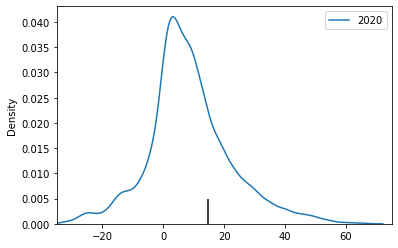

In [ ]:
PlotReturnKde(2020)

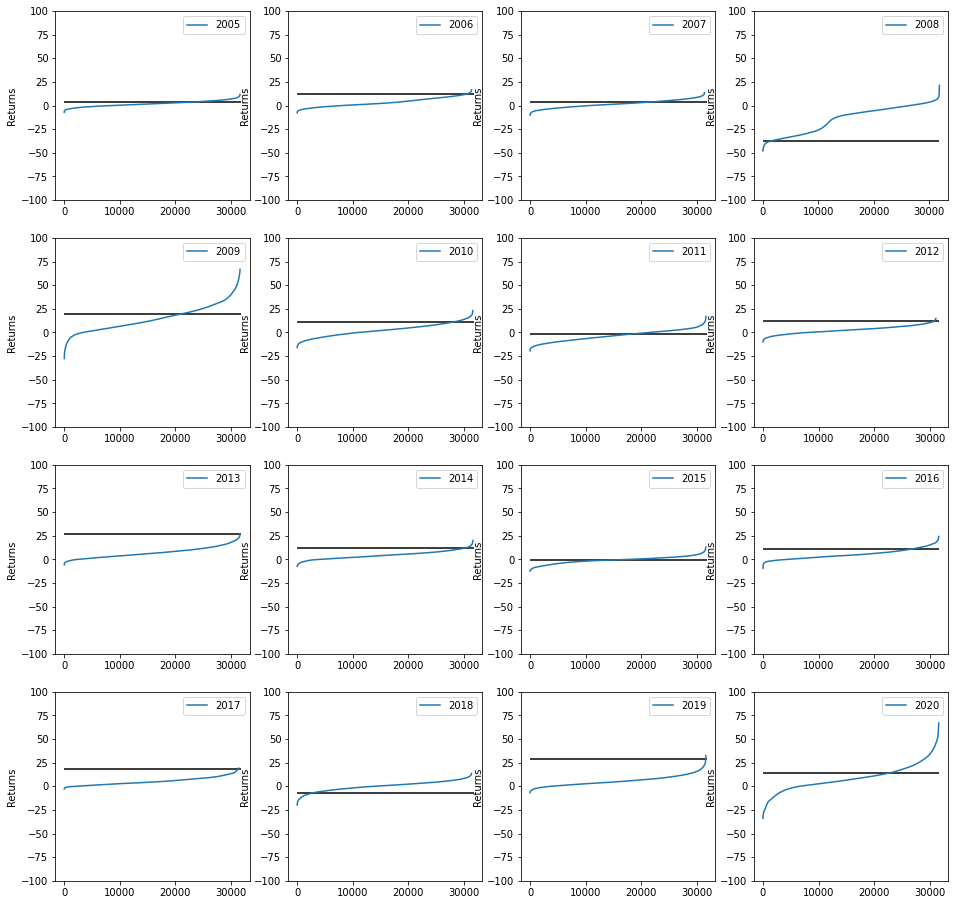

In [ ]:
plt.subplots(4,4, figsize=(16,16))

for y in range(2005,2021):
  plt.subplot(4,4,y-2004)
  PlotReturnDistCurve(y)
  PlotClosingReturn(y)

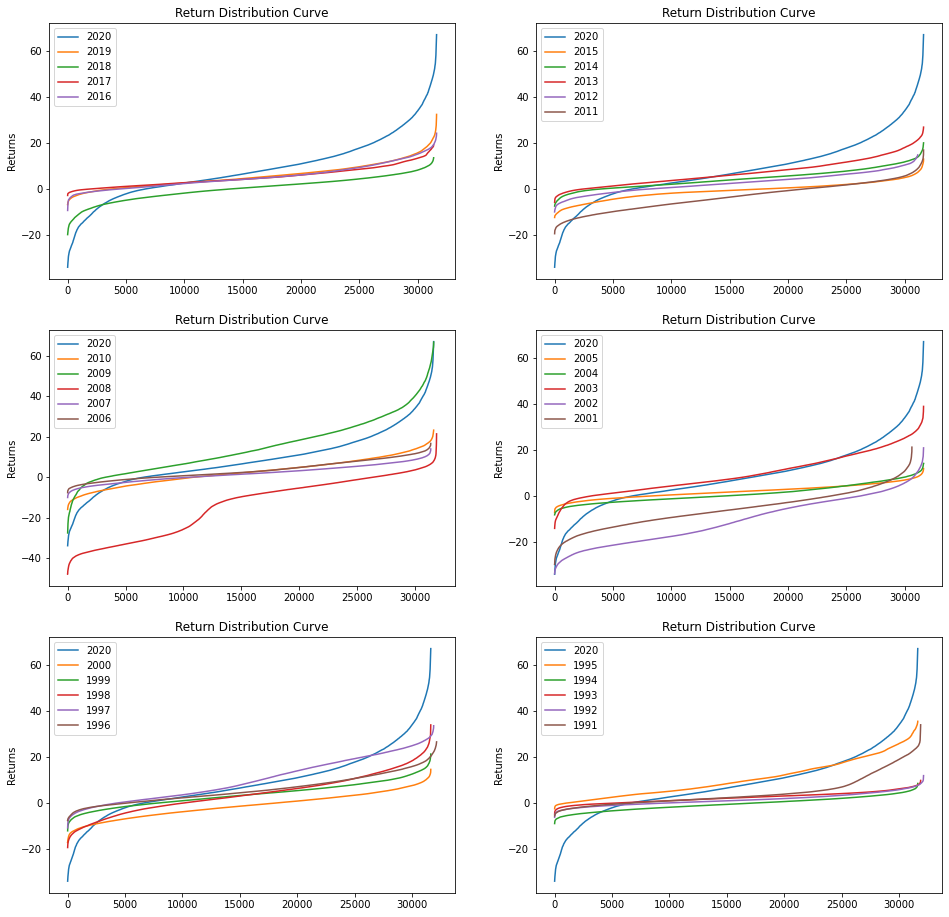

In [ ]:
plt.subplots(3,2, figsize=(16,16))

plt.subplot(3,2,1)

PlotReturnDistCurve(2020)
PlotReturnDistCurve(2019)
PlotReturnDistCurve(2018)
PlotReturnDistCurve(2017)
PlotReturnDistCurve(2016)

plt.subplot(3,2,2)

PlotReturnDistCurve(2020)
PlotReturnDistCurve(2015)
PlotReturnDistCurve(2014)
PlotReturnDistCurve(2013)
PlotReturnDistCurve(2012)
PlotReturnDistCurve(2011)

plt.subplot(3,2,3)

PlotReturnDistCurve(2020)
PlotReturnDistCurve(2010)
PlotReturnDistCurve(2009)
PlotReturnDistCurve(2008)
PlotReturnDistCurve(2007)
PlotReturnDistCurve(2006)

plt.subplot(3,2,4)

PlotReturnDistCurve(2020)
PlotReturnDistCurve(2005)
PlotReturnDistCurve(2004)
PlotReturnDistCurve(2003)
PlotReturnDistCurve(2002)
PlotReturnDistCurve(2001)

plt.subplot(3,2,5)

PlotReturnDistCurve(2020)
PlotReturnDistCurve(2000)
PlotReturnDistCurve(1999)
PlotReturnDistCurve(1998)
PlotReturnDistCurve(1997)
PlotReturnDistCurve(1996)

plt.subplot(3,2,6)

PlotReturnDistCurve(2020)
PlotReturnDistCurve(1995)
PlotReturnDistCurve(1994)
PlotReturnDistCurve(1993)
PlotReturnDistCurve(1992)
PlotReturnDistCurve(1991)

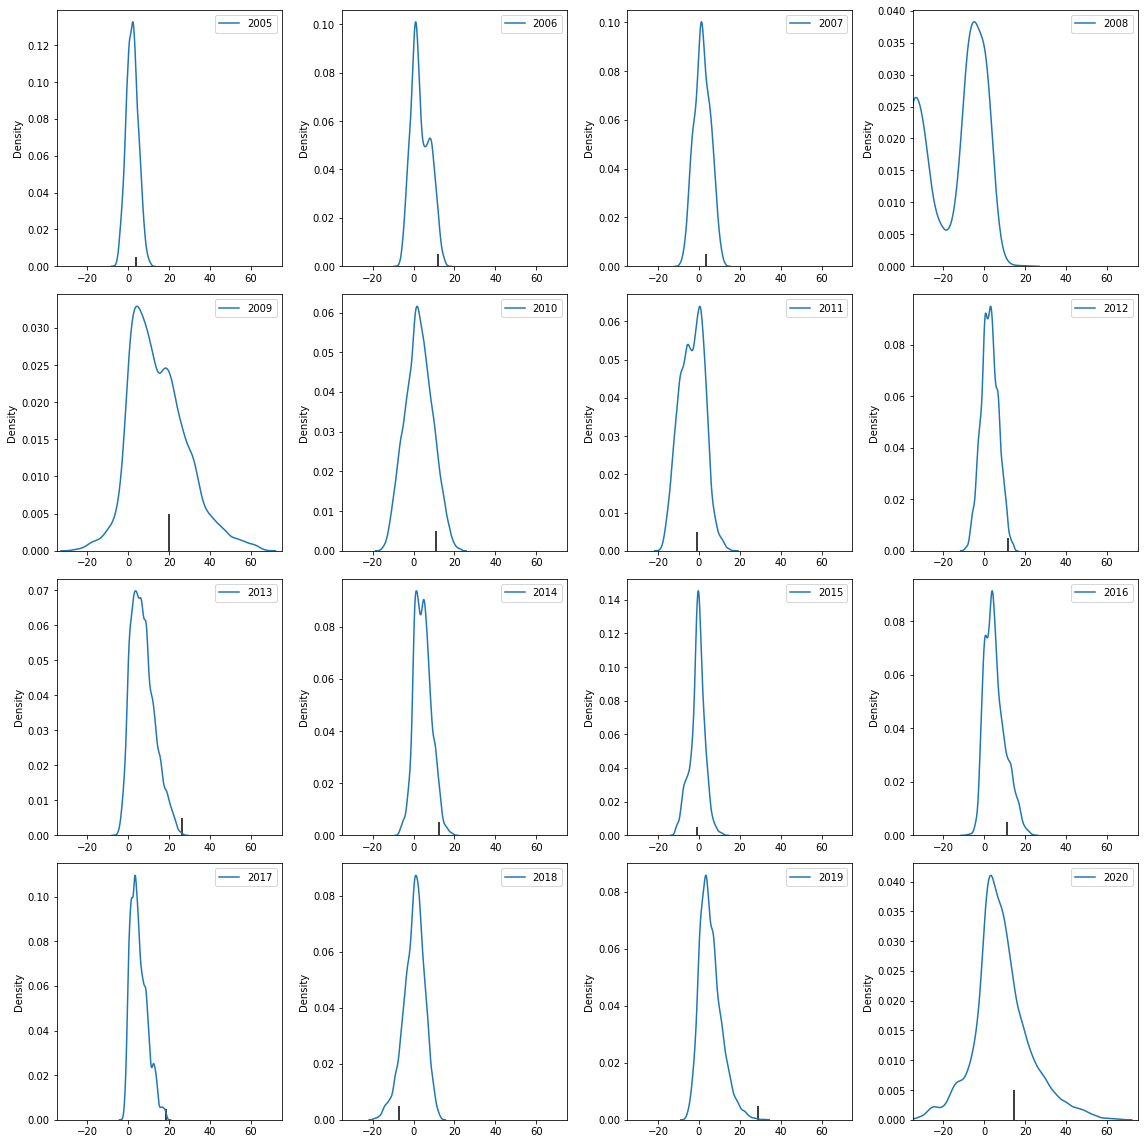

In [ ]:
plt.subplots(4,4, figsize=(16,16))

for y in range(2005,2021):
  plt.subplot(4,4,y-2004)
  PlotReturnKde(y)

plt.tight_layout()